In [18]:
import pandas as pd
import path as os
import random
import numpy as np
import matplotlib.pyplot as plt
import scipy
from scipy.stats import levene
from scipy.stats import ttest_ind
from scipy.stats import ttest_ind_from_stats

In [2]:
# read in original dataset
stroke_df = pd.read_csv('Resources/healthcare-dataset-stroke-data.csv')
stroke_df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [3]:
#create dataframe for all yes stroke outcomes
stroke_yes = stroke_df[stroke_df['stroke'] == 1]
stroke_yes

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
244,17739,Male,57.0,0,0,Yes,Private,Rural,84.96,36.7,Unknown,1
245,49669,Female,14.0,0,0,No,children,Rural,57.93,30.9,Unknown,1
246,27153,Female,75.0,0,0,Yes,Self-employed,Rural,78.80,29.3,formerly smoked,1
247,34060,Male,71.0,1,0,Yes,Self-employed,Rural,87.80,NaN,Unknown,1


In [4]:
#Create dataframe for all non-stroke outcomes
stroke_no = stroke_df[stroke_df['stroke'] == 0]
stroke_no

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
249,30669,Male,3.0,0,0,No,children,Rural,95.12,18.0,Unknown,0
250,30468,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0
251,16523,Female,8.0,0,0,No,Private,Urban,110.89,17.6,Unknown,0
252,56543,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0
253,46136,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.1,Unknown,0
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [5]:
# get 100 random average glucose levels from all yes stroke outcomes
agl_yes = random.sample(list(stroke_yes['avg_glucose_level']), 100)


In [6]:
# get 100 random average glucose levels from all non-stroke outcomes
agl_no = random.sample(list(stroke_no['avg_glucose_level']), 100)

In [7]:
#describe stoke dataframe 
stroke_yes.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,249.000000,249.000000,249.000000,249.000000,249.000000,209.000000,249.0
mean,37115.068273,67.728193,0.265060,0.188755,132.544739,30.471292,1.0
std,21993.344872,12.727419,0.442254,0.392102,61.921056,6.329452,0.0
min,210.000000,1.320000,0.000000,0.000000,56.110000,16.900000,1.0
25%,17013.000000,59.000000,0.000000,0.000000,79.790000,26.400000,1.0
50%,36706.000000,71.000000,0.000000,0.000000,105.220000,29.700000,1.0
75%,56669.000000,78.000000,1.000000,0.000000,196.710000,33.700000,1.0
max,72918.000000,82.000000,1.000000,1.000000,271.740000,56.600000,1.0


In [8]:
#describe non-stroke dataframe
stroke_no.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,4861.000000,4861.000000,4861.000000,4861.000000,4861.000000,4700.000000,4861.0
mean,36487.236371,41.971545,0.088871,0.047110,104.795513,28.823064,0.0
std,21120.133386,22.291940,0.284586,0.211895,43.846069,7.908287,0.0
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.0
25%,17762.000000,24.000000,0.000000,0.000000,77.120000,23.400000,0.0
50%,36958.000000,43.000000,0.000000,0.000000,91.470000,28.000000,0.0
75%,54497.000000,59.000000,0.000000,0.000000,112.830000,33.100000,0.0
max,72940.000000,82.000000,1.000000,1.000000,267.760000,97.600000,0.0


array([[<AxesSubplot:title={'center':'avg_glucose_level'}>]], dtype=object)

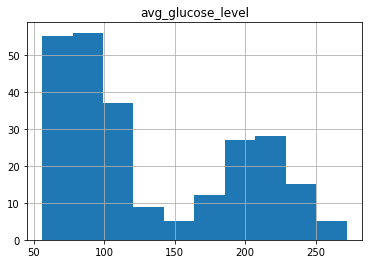

In [15]:
#plot distribution of average_glucose_level for stroke outcome
stroke_yes.hist(column='avg_glucose_level')


array([[<AxesSubplot:title={'center':'avg_glucose_level'}>]], dtype=object)

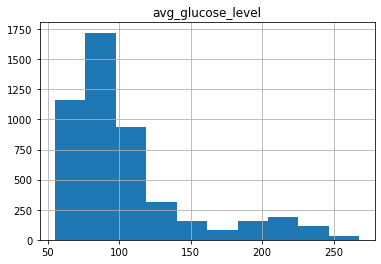

In [16]:
#plot distribution of average_glucose_level for non-stroke outcome
stroke_no.hist(column='avg_glucose_level')

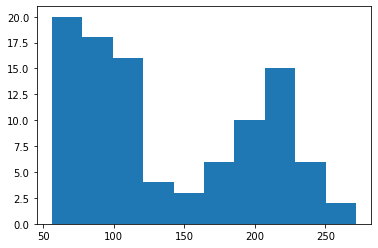

In [19]:
plt.hist(agl_yes)
plt.show()

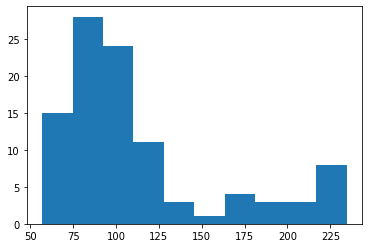

In [20]:
plt.hist(agl_no)
plt.show()

In [13]:
#test if two samples have similar variances
stat, p = levene(agl_yes, agl_no)
p

7.354141750784648e-05

In [12]:
#perform t-test for samples without similar variances
ttest_ind_from_stats(mean1=132.54, std1=61.92, nobs1=249, mean2=104.80, std2=43.85, nobs2=4861)

Ttest_indResult(statistic=9.509430365208102, pvalue=2.872279057752545e-21)